In [2]:
using CSV
using DataFrames
using LinearAlgebra
using Plots
using YAML

In [3]:
# Load the CSV and YAML files
particles = CSV.read("particles.csv", DataFrame)
config = YAML.load_file("config.yaml")
config2 = YAML.load_file("config2.yaml")

Dict{Any, Any} with 4 entries:
  "name"    => "WhitePaper_300k/test/WhitePaper_300k/sim_test_62419_1"
  "creator" => "CORSIKA8"
  "args"    => "/n/holylfs05/LABS/arguelles_delgado_lab/Lab/common_software/sou…
  "version" => "8.0.0-prealpha"

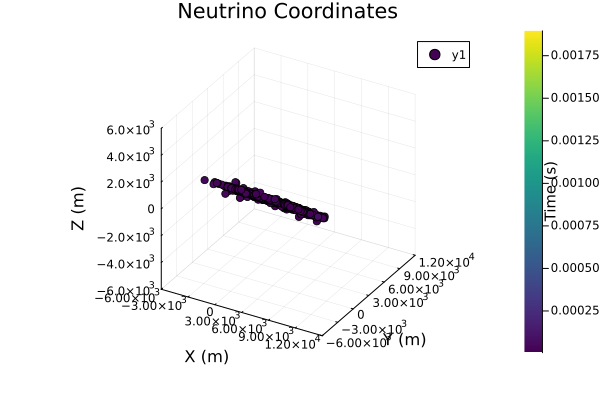

In [4]:
# Define common axis limits
x_limits = (-6000, 12000)
y_limits = (-6000, 12000)
z_limits = (-6000, 6000)

# Define the vectors and rotation matrix
normal_vector = [0.45217398524533681 -0.3661629880519191 0.81330397346148509]
x_axis = [0.0 -0.91184756344828699 -0.41052895273466672]
y_axis = [0.89192975455881607 0.18563051261662877 -0.41231374670066206]

rotation_matrix = vcat(x_axis, y_axis, normal_vector)

# Extract the columns as vectors and stack them into a matrix
coords = hcat(particles.x, particles.y, particles.z)

# Apply the rotation matrix
rotated_positions = inv(rotation_matrix) * transpose(coords)

# Neutrino Coordinates Plot
plot1 = scatter3d(rotated_positions[1, :], rotated_positions[2, :], rotated_positions[3, :], 
                  xlabel="X (m)", ylabel="Y (m)", zlabel="Z (m)", 
                  xlims=x_limits, ylims=y_limits, zlims=z_limits,
                  title="Neutrino Coordinates", 
                  marker_z=particles.time, color=:viridis, colorbar=true, 
                  colorbar_title="Time (s)")


Plane Center: Real[0, 0, 6.373992525515844e6]
Plane Normal: [0.4521739852453368, -0.3661629880519191, 0.8133039734614851]
X-axis: Real[0, -0.911847563448287, -0.4105289527346667]
Y-axis: [0.8919297545588161, 0.18563051261662877, -0.41231374670066206]


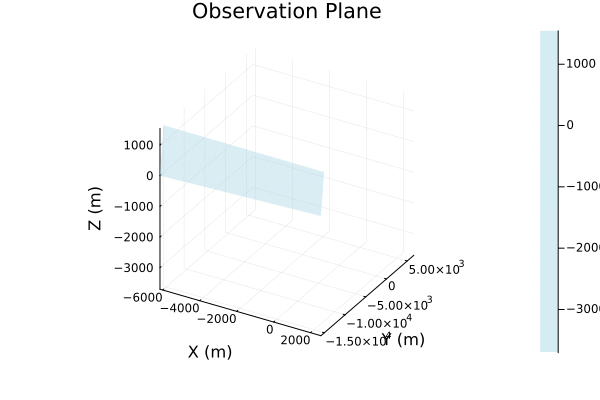

 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.
 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.
 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.


In [5]:
# Load the YAML file and inspect its structure
config = YAML.load_file("config.yaml")

# Extract the plane information
plane_center = config["plane"]["center"]
plane_normal = config["plane"]["normal"]
x_axis = config["x-axis"]
y_axis = config["y-axis"]

println("Plane Center: ", plane_center)
println("Plane Normal: ", plane_normal)
println("X-axis: ", x_axis)
println("Y-axis: ", y_axis)

theta = 203.76835088101396 * pi/180

x_range = range(-5000, 12000, length=100)
y_range = range(-5000, 12000, length=100)

x_rot = x_range * cos(theta) - y_range * sin(theta)
y_rot = x_range * sin(theta) + y_range * cos(theta)

z = (-normal_vector[1]*x_rot - normal_vector[2]*y_rot)/normal_vector[3]

surface(x_rot, y_rot, z, alpha=0.5, color=:lightblue, label="Observation Plane")

xlabel!("X (m)")
ylabel!("Y (m)")
zlabel!("Z (m)")
title!("Observation Plane")

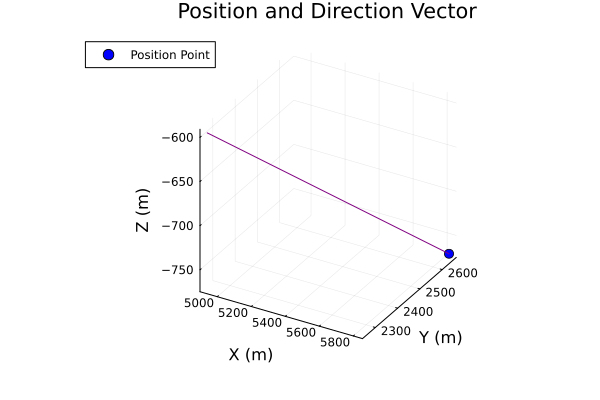

In [6]:
# Load YAML content from the file
config2 = YAML.load_file("config2.yaml")

# Extract the 'args' string
args = config2["args"]

# Function to extract parameter values from the "args" string
function extract_param(args::String, param::String)
    pattern = Regex("$param ([-+]?[0-9]*\\.?[0-9]+)")
    match_result = match(pattern, args)
    return match_result !== nothing ? parse(Float64, match_result.captures[1]) : nothing
end

# Extract parameters and convert them to meters
zenith = extract_param(args, "--zenith")
azimuth = extract_param(args, "--azimuth")
xpos = extract_param(args, "--xpos") * 1000  # Convert from km to meters
ypos = extract_param(args, "--ypos") * 1000  # Convert from km to meters
zpos = extract_param(args, "--zpos") * 1000  # Convert from km to meters
xdir = extract_param(args, "--xdir")  # No conversion needed, directional component
ydir = extract_param(args, "--ydir")  # No conversion needed, directional component
zdir = extract_param(args, "--zdir")  # No conversion needed, directional component

# Convert zenith and azimuth from degrees to radians for vector calculations
zenith_rad = deg2rad(zenith)
azimuth_rad = deg2rad(azimuth)

# Function to convert spherical to Cartesian coordinates for direction vectors
function spherical_to_cartesian(zenith_rad, azimuth_rad)
    vx = sin(zenith_rad) * cos(azimuth_rad)
    vy = sin(zenith_rad) * sin(azimuth_rad)
    vz = -cos(zenith_rad)
    return vx, vy, vz
end

# Convert direction from spherical to Cartesian
vx, vy, vz = spherical_to_cartesian(zenith_rad, azimuth_rad)

# Scale the direction vector components to visualize them on the plot effectively
scale_factor = 1000  # Adjust this as needed to make the vector visible on the plot
vx *= scale_factor
vy *= scale_factor
vz *= scale_factor

# Plot the position and vector
scatter3d([xpos], [ypos], [zpos], xlabel="X (m)", ylabel="Y (m)", zlabel="Z (m)", 
          title="Position and Direction Vector", markersize=5, color=:blue, label="Position Point")
quiver!([xpos], [ypos], [zpos], quiver=([vx], [vy], [vz]), arrow=true, label="Direction Vector", color=:purple)

In [7]:
println(config2)

Dict{Any, Any}("name" => "WhitePaper_300k/test/WhitePaper_300k/sim_test_62419_1", "creator" => "CORSIKA8", "args" => "/n/holylfs05/LABS/arguelles_delgado_lab/Lab/common_software/source/corsika8/corsika-work/corsika --pdg -211 --energy 134431.50919983155 --zenith 99.99732787664736 --azimuth 203.76835088101396 --xpos 5.82690291372798 --ypos 2.651239329640523 --zpos -0.7696777502523529 -f WhitePaper_300k/test/WhitePaper_300k/sim_test_62419_1 --xdir 0.4521739852453368 --ydir -0.3661629880519191 --zdir 0.8133039734614851 -O 2.9925255158436626 --force-interaction --x-intercept -1.9042410053751477 --y-intercept -0.7535013903260498 --z-intercept 0.7194652218340803 --emcut 1 --mucut 1 --hadcut 1 ", "version" => "8.0.0-prealpha")


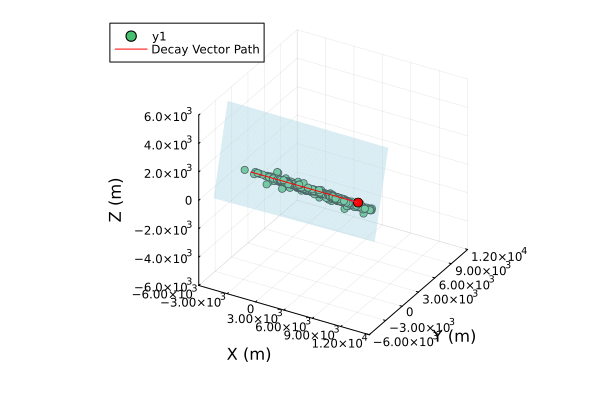

 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.
 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.
 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.


In [8]:
# Create the combined plot
plot_combined = scatter3d(rotated_positions[1, :], rotated_positions[2, :], rotated_positions[3, :], 
                          xlabel="X (m)", ylabel="Y (m)", zlabel="Z (m)", 
                          xlims=x_limits, ylims=y_limits, zlims=z_limits,
                          title="", 
                          marker_z=particles.time, color=:viridis, colorbar=false, 
                          colorbar_title="Time (s)")

# Add the observation plane to the plot
surface!(plot_combined, x_range, y_range, z, alpha=0.5, color=:lightblue, label="Observation Plane")

# Add the decay particle vector to the plot
scatter3d!([xpos], [ypos], [zpos], markersize=5, color=:red, label="")
quiver!([xpos], [ypos], [zpos], quiver=([vx], [vy], [vz]), arrow=true, label="Decay Vector")

# Plot the path of the decay vector for better visibility
num_points = 10
path_x = xpos .+ vx * range(0, 10, length=num_points)
path_y = ypos .+ vy * range(0, 10, length=num_points)
path_z = zpos .+ vz * range(0, 10, length=num_points)

plot3d!(path_x, path_y, path_z, label="Decay Vector Path", color=:red)

# Display the combined plot
display(plot_combined)




In [10]:
savefig("combined_coordinate_plot.png")

 ***   ALL COLLINEAR DATA POINTS.
   NDP =  100
 ERROR DETECTED IN ROUTINE   IDTANG.


"/Users/carlitos/Desktop/TAMBO/Neutrino_Plot/combined_coordinate_plot.png"